In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.utils import to_categorical
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import string 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

nltk.download('stopwords')
# Load the dataset
column_names = ['text', 'emotion']
data = pd.read_csv("/content/drive/MyDrive/DATA SET FINAL/train - train.csv",header=None, names=column_names)


# preprocess the text by removing stop words, punctuation, and special characters
def preprocess_text(text):
    # remove stop words and special characters
    text = text.lower()
    text = text.translate(text.maketrans("", "", string.punctuation))
    text = text.translate(text.maketrans("", "", string.digits))
    text = text.translate(text.maketrans("", "", string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Get the unique emotions in the dataset
emotions = data['emotion'].unique().tolist()


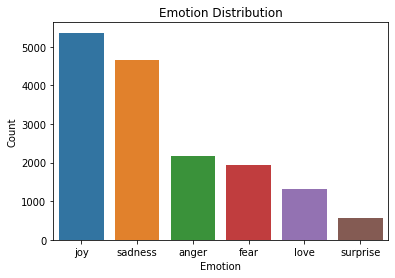

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of samples for each emotion
emotion_counts = data['emotion'].value_counts()

# Plot the emotion distribution
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.show()

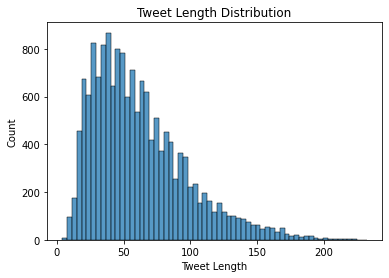

In [ ]:
# Compute the length of each tweet
tweet_lengths = data['text'].apply(len)

# Plot the tweet length distribution
sns.histplot(tweet_lengths, kde=False)
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.title('Tweet Length Distribution')
plt.show()


In [ ]:


# tokenize the text and create a dataset of sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

# pad the sequences to create a uniform length
max_length = max([len(s) for s in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

from sklearn.preprocessing import LabelEncoder
# create a LabelEncoder object
encoder = LabelEncoder()

# encode the labels
data['emotion'] = encoder.fit_transform(data['emotion'])

# One-hot encode the labels
labels = to_categorical(data['emotion'])



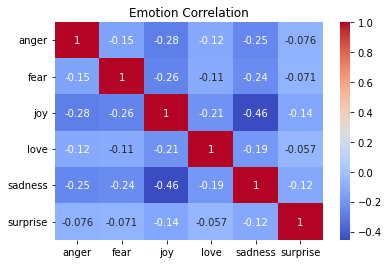

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = np.corrcoef(labels.T)

# Create a dataframe from the correlation matrix
corr_df = pd.DataFrame(corr_matrix, columns=encoder.classes_, index=encoder.classes_)

# Plot the correlation matrix
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Emotion Correlation')
plt.show()


In [ ]:
# split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(sequences, labels, test_size=0.2, random_state=42)


In [ ]:
# import the History callback
from tensorflow.keras.callbacks import History

# create a History object
history_cnn = History()
history_lstm = History()
history_cnn_lstm = History()


In [ ]:
from keras.layers import *
# import the History callback
from tensorflow.keras.callbacks import History

# create a History object
history_cnn = History()
history_lstm = History()
history_cnn_lstm = History()


vocab_size = len(tokenizer.word_index) + 1
embedding_dim=128
# define a CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
cnn_model.add(Conv1D(64, 3, activation='relu'))
cnn_model.add(MaxPooling1D(3))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(len(labels[0]), activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# define an LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(len(labels[0]), activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# define a CNN-LSTM hybrid model
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
cnn_lstm_model.add(Conv1D(64, 3, activation='relu'))
cnn_lstm_model.add(MaxPooling1D(3))
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(len(labels[0]), activation='softmax'))
cnn_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the CNN model
cnn_model.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val), callbacks=[history_cnn])

# train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val), callbacks=[history_lstm])

# train the CNN-LSTM model
cnn_lstm_model.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val), callbacks=[history_cnn_lstm])

cnn_history = history_cnn.history
lstm_history = history_lstm.history
cnn_lstm_history = history_cnn_lstm.history


Epoch 1/10
200/200 [==============================] - 10s 45ms/step - loss: 1.3101 - accuracy: 0.4944 - val_loss: 0.7883 - val_accuracy: 0.7394
Epoch 2/10
200/200 [==============================] - 9s 45ms/step - loss: 0.4053 - accuracy: 0.8715 - val_loss: 0.3524 - val_accuracy: 0.8813
Epoch 3/10
200/200 [==============================] - 9s 46ms/step - loss: 0.1193 - accuracy: 0.9604 - val_loss: 0.3191 - val_accuracy: 0.8903
Epoch 4/10
200/200 [==============================] - 10s 49ms/step - loss: 0.0477 - accuracy: 0.9840 - val_loss: 0.3470 - val_accuracy: 0.8878
Epoch 5/10
200/200 [==============================] - 16s 79ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.3732 - val_accuracy: 0.8913
Epoch 6/10
200/200 [==============================] - 17s 85ms/step - loss: 0.0239 - accuracy: 0.9914 - val_loss: 0.4162 - val_accuracy: 0.8816
Epoch 7/10
200/200 [==============================] - 9s 44ms/step - loss: 0.0174 - accuracy: 0.9938 - val_loss: 0.4125 - val_accuracy: 0.

In [ ]:
import json

histories = [cnn_history, lstm_history, cnn_lstm_history]
names = ['cnn', 'lstm', 'cnn_lstm']

for history, name in zip(histories, names):
    with open(name + '_history.json', 'w') as f:
        json.dump(history, f)

print("All history saved as json files!")


All history saved as json files!


In [ ]:
# evaluate the performance of the models
cnn_loss, cnn_acc = cnn_model.evaluate(X_val, y_val, verbose=0)
lstm_loss, lstm_acc = lstm_model.evaluate(X_val, y_val, verbose=0)
cnn_lstm_loss, cnn_lstm_acc = cnn_lstm_model.evaluate(X_val, y_val, verbose=0)

# print the results
print("CNN Model - Loss: {:.4f} - Accuracy: {:.4f}".format(cnn_loss, cnn_acc))
print("LSTM Model - Loss: {:.4f} - Accuracy: {:.4f}".format(lstm_loss, lstm_acc))
print("CNN-LSTM Model - Loss: {:.4f} - Accuracy: {:.4f}".format(cnn_lstm_loss, cnn_lstm_acc))

CNN Model - Loss: 0.4819 - Accuracy: 0.8828
LSTM Model - Loss: 0.4077 - Accuracy: 0.8938
CNN-LSTM Model - Loss: 0.4287 - Accuracy: 0.8984


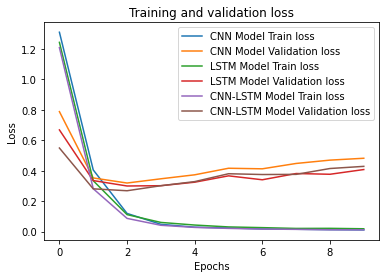

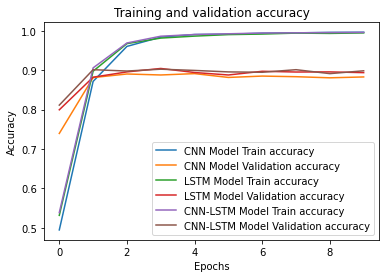

In [ ]:
# import matplotlib library
import matplotlib.pyplot as plt

# plot the training and validation loss
plt.plot(cnn_history['loss'],label='CNN Model Train loss')
plt.plot(cnn_history['val_loss'],label='CNN Model Validation loss')
plt.plot(lstm_history['loss'],label='LSTM Model Train loss')
plt.plot(lstm_history['val_loss'],label='LSTM Model Validation loss')
plt.plot(cnn_lstm_history['loss'],label='CNN-LSTM Model Train loss')
plt.plot(cnn_lstm_history['val_loss'],label='CNN-LSTM Model Validation loss')

# set the title and labels
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# show the plot
plt.show()

# plot the training and validation accuracy
plt.plot(cnn_history['accuracy'],label='CNN Model Train accuracy')
plt.plot(cnn_history['val_accuracy'],label='CNN Model Validation accuracy')
plt.plot(lstm_history['accuracy'],label='LSTM Model Train accuracy')
plt.plot(lstm_history['val_accuracy'],label='LSTM Model Validation accuracy')
plt.plot(cnn_lstm_history['accuracy'],label='CNN-LSTM Model Train accuracy')
plt.plot(cnn_lstm_history['val_accuracy'],label='CNN-LSTM Model Validation accuracy')

# set the title and labels
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# show the plot
plt.show()


In [ ]:
cnn_model.save("cnn_model.h5")
lstm_model.save("lstm_model.h5")
cnn_lstm_model.save("cnn_lstm_model.h5")
cnn_model.save_weights("cnn_model_weights.h5")
lstm_model.save_weights("lstm_model_weights.h5")
cnn_lstm_model.save_weights("cnn_lstm_model_weights.h5")


100/100 [==============================] - 2s 13ms/step


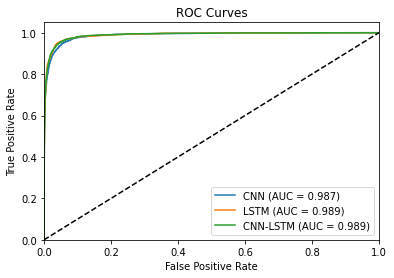

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC for each model
fpr_cnn, tpr_cnn, _ = roc_curve(y_val.ravel(), cnn_model.predict(X_val).ravel())
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_lstm, tpr_lstm, _ = roc_curve(y_val.ravel(), lstm_model.predict(X_val).ravel())
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_cnn_lstm, tpr_cnn_lstm, _ = roc_curve(y_val.ravel(), cnn_lstm_model.predict(X_val).ravel())
roc_auc_cnn_lstm = auc(fpr_cnn_lstm, tpr_cnn_lstm)

# Plot the ROC curves
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = {:.3f})'.format(roc_auc_cnn))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (AUC = {:.3f})'.format(roc_auc_lstm))
plt.plot(fpr_cnn_lstm, tpr_cnn_lstm, label='CNN-LSTM (AUC = {:.3f})'.format(roc_auc_cnn_lstm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from keras.models import load_model
# Load the best model
best_model =  load_model("cnn_model.h5")

In [ ]:
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 128)           1928320   
                                                                 
 conv1d (Conv1D)             (None, 33, 64)            24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 704)               0         
                                                                 
 dense (Dense)               (None, 64)                45120     
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                        

In [ ]:
import pandas as pd

# Load test dataset
test_data = pd.read_csv("/content/drive/MyDrive/DATA SET FINAL/test - test.csv",header=None, names=column_names)
texts = test_data['text'].values

# Preprocess test dataset
texts = [preprocess_text(text) for text in texts]
texts = tokenizer.texts_to_sequences(texts)
texts = pad_sequences(texts, maxlen=max_length)

# Make predictions on test dataset
y_pred = best_model.predict(texts)
y_test = test_data['emotion'].values

# Convert the predicted probabilities to class labels
y_pred_class = np.argmax(y_pred, axis=1)

#transform test labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

#get the labels for test and predictions
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_class)

for i in range(len(texts)):
    print("Sample {}: Text: {}  Original Label: {}  Prediction: {}".format(i+1, test_data['text'][i], y_test_labels[i], y_pred_labels[i]))


63/63 [==============================] - 1s 12ms/step
Sample 1: Text: im feeling rather rotten so im not very ambitious right now  Original Label: sadness  Prediction: sadness
Sample 2: Text: im updating my blog because i feel shitty  Original Label: sadness  Prediction: sadness
Sample 3: Text: i never make her separate from me because i don t ever want her to feel like i m ashamed with her  Original Label: sadness  Prediction: sadness
Sample 4: Text: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived  Original Label: joy  Prediction: joy
Sample 5: Text: i was feeling a little vain when i did this one  Original Label: sadness  Prediction: sadness
Sample 6: Text: i cant walk into a shop anywhere where i do not feel uncomfortable  Original Label: fear  Prediction: fear
Sample 7: Text: i felt anger when at the end of a telephone call  Original Label: anger  Prediction: joy
Sample 8: Text: i explain why i clung to a relationshi

In [ ]:
# Generate a classification report
classification_report(y_test, y_pred_class, target_names=emotions)

'              precision    recall  f1-score   support\n\n     sadness       0.89      0.87      0.88       275\n       anger       0.91      0.80      0.85       224\n        love       0.88      0.95      0.92       695\n    surprise       0.81      0.66      0.73       159\n        fear       0.94      0.92      0.93       581\n         joy       0.65      0.80      0.72        66\n\n    accuracy                           0.89      2000\n   macro avg       0.85      0.84      0.84      2000\nweighted avg       0.89      0.89      0.89      2000\n'

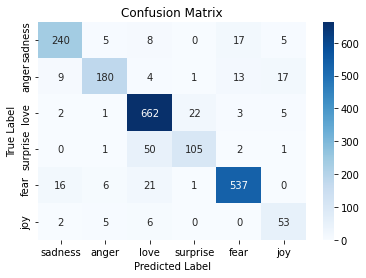

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index=emotions, columns=emotions)

# Plot the confusion matrix
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from typing import List

def predict_emotion(text: str) -> List[str]:
    # Preprocess text
    text = preprocess_text(text)
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=max_length)

    # Make predictions using all three models
    cnn_pred = np.argmax(cnn_model.predict(text))
    lstm_pred = np.argmax(lstm_model.predict(text))
    cnn_lstm_pred = np.argmax(cnn_lstm_model.predict(text))

    # Return the predicted emotions
    return [emotions[cnn_pred], emotions[lstm_pred], emotions[cnn_lstm_pred]]


In [ ]:
# Test the function
text = "I found a dead body"
predict_emotion(text)


1/1 [==============================] - 1s 503ms/step


['love', 'anger', 'anger']

In [ ]:
import tweepy

# Twitter API keys
consumer_key = "YOUR_CONSUMER_KEY"
consumer_secret = "YOUR_CONSUMER_SECRET"
access_token = "YOUR_ACCESS_TOKEN"
access_token_secret = "YOUR_ACCESS_TOKEN_SECRET"

# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# List of tweet IDs
tweet_ids = ["123", "456", "789"]

# Retrieve tweets by ID and predict emotions
for tweet_id in tweet_ids:
    tweet = api.get_status(tweet_id)
    text = tweet.text
    predicted_emotions = predict_emotion(text)
    print(f"Tweet ID: {tweet_id}, Text: {text}, CNN Model Prediction: {predicted_emotions[0]}, LSTM Model Prediction: {predicted_emotions[1]}, CNN-LSTM Model Prediction: {predicted_emotions[2]}")


In [ ]:
# Load the new dataset
column_names = ['text', 'emotion']
new_data = pd.read_csv("/content/drive/MyDrive/DATA SET FINAL/NRC-Emotion-Intensity-Lexicon - NRC-Emotion-Intensity-Lexicon-v1.csv",header=None, names=column_names)
# Keep only the rows with the desired emotions
valid_emotions = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']
new_data = new_data[new_data['emotion'].isin(valid_emotions)]

# reset the index
new_data=new_data.reset_index(drop=True)

# Preprocess the new dataset
new_data['text'] = new_data['text'].apply(preprocess_text)

# tokenize the text and create a dataset of sequences
new_sequences = tokenizer.texts_to_sequences(new_data['text'])

# pad the sequences to create a uniform length
new_sequences = pad_sequences(new_sequences, maxlen=max_length, padding='pre')

# encode the labels
new_data['emotion'] = encoder.transform(new_data['emotion'])

# One-hot encode the labels
new_labels = to_categorical(new_data['emotion'])

# concatenate the datasets
X_train = np.concatenate((X_train, new_sequences), axis=0)
y_train = np.concatenate((y_train, new_labels), axis=0)

# train the CNN model
cnn_model.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val), callbacks=[history_cnn])

# train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val), callbacks=[history_lstm])

# train the CNN-LSTM model
cnn_lstm_model.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val, y_val), callbacks=[history_cnn_lstm])

cnn_history1 = history_cnn.history
lstm_history1 = history_lstm.history
cnn_lstm_history1 = history_cnn_lstm.history


Epoch 1/10
400/400 [==============================] - 18s 44ms/step - loss: 0.7660 - accuracy: 0.6558 - val_loss: 0.5715 - val_accuracy: 0.8691
Epoch 2/10
400/400 [==============================] - 17s 43ms/step - loss: 0.6561 - accuracy: 0.7074 - val_loss: 0.6350 - val_accuracy: 0.8606
Epoch 3/10
400/400 [==============================] - 18s 44ms/step - loss: 0.5930 - accuracy: 0.7210 - val_loss: 0.7256 - val_accuracy: 0.8559
Epoch 4/10
400/400 [==============================] - 18s 45ms/step - loss: 0.5643 - accuracy: 0.7235 - val_loss: 0.7328 - val_accuracy: 0.8612
Epoch 5/10
400/400 [==============================] - 17s 43ms/step - loss: 0.5505 - accuracy: 0.7268 - val_loss: 0.7430 - val_accuracy: 0.8603
Epoch 6/10
400/400 [==============================] - 17s 43ms/step - loss: 0.5433 - accuracy: 0.7264 - val_loss: 0.7801 - val_accuracy: 0.8578
Epoch 7/10
400/400 [==============================] - 18s 44ms/step - loss: 0.5384 - accuracy: 0.7287 - val_loss: 0.7888 - val_accuracy:

In [ ]:
import json

histories = [cnn_history1, lstm_history1, cnn_lstm_history1]
names = ['cnn1', 'lstm1', 'cnn_lstm1']

for history, name in zip(histories, names):
    with open(name + '_history.json', 'w') as f:
        json.dump(history, f)

print("All history saved as json files!")

All history saved as json files!


In [ ]:
cnn_model.save("cnn_model1.h5")
lstm_model.save("lstm_model1.h5")
cnn_lstm_model.save("cnn_lstm_model1.h5")
cnn_model.save_weights("cnn_model_weights1.h5")
lstm_model.save_weights("lstm_model_weights1.h5")
cnn_lstm_model.save_weights("cnn_lstm_model_weights1.h5")

cnn_model.h5 : Training loss: [0.010316683910787106, 0.9967187643051147], Validation loss: [0.5458933115005493, 0.8762500286102295]
cnn_model.h5 : Training accuracy: [0.010316683910787106, 0.9967187643051147], Validation accuracy: [0.5458933115005493, 0.8762500286102295]
100/100 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

       anger       0.89      0.86      0.87       427
        fear       0.88      0.76      0.81       397
         joy       0.87      0.95      0.91      1021
        love       0.84      0.67      0.75       296
     sadness       0.92      0.94      0.93       946
    surprise       0.65      0.78      0.71       113

    accuracy                           0.88      3200
   macro avg       0.84      0.82      0.83      3200
weighted avg       0.88      0.88      0.87      3200



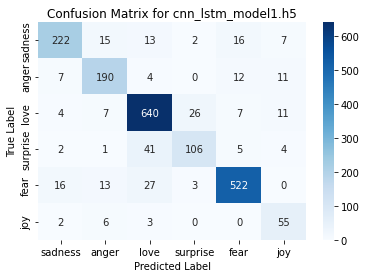

lstm_model.h5 : Training loss: [0.008966365829110146, 0.9967187643051147], Validation loss: [0.44057855010032654, 0.890625]
lstm_model.h5 : Training accuracy: [0.008966365829110146, 0.9967187643051147], Validation accuracy: [0.44057855010032654, 0.890625]
100/100 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

       anger       0.86      0.91      0.89       427
        fear       0.84      0.84      0.84       397
         joy       0.90      0.92      0.91      1021
        love       0.81      0.79      0.80       296
     sadness       0.94      0.93      0.94       946
    surprise       0.84      0.62      0.71       113

    accuracy                           0.89      3200
   macro avg       0.87      0.84      0.85      3200
weighted avg       0.89      0.89      0.89      3200



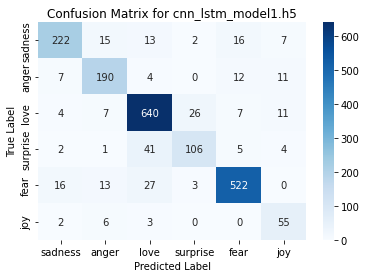

cnn_lstm_model.h5 : Training loss: [0.007294563576579094, 0.9973437786102295], Validation loss: [0.4434286057949066, 0.8940625190734863]
cnn_lstm_model.h5 : Training accuracy: [0.007294563576579094, 0.9973437786102295], Validation accuracy: [0.4434286057949066, 0.8940625190734863]
100/100 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

       anger       0.87      0.91      0.89       427
        fear       0.87      0.82      0.85       397
         joy       0.89      0.95      0.92      1021
        love       0.85      0.71      0.78       296
     sadness       0.94      0.94      0.94       946
    surprise       0.78      0.68      0.73       113

    accuracy                           0.89      3200
   macro avg       0.87      0.84      0.85      3200
weighted avg       0.89      0.89      0.89      3200



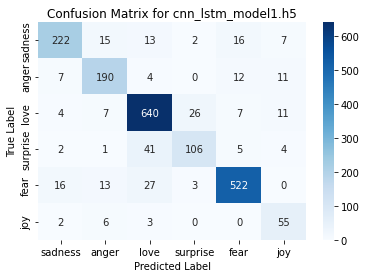

cnn_model1.h5 : Training loss: [0.0052653346210718155, 0.9978125095367432], Validation loss: [0.8823476433753967, 0.854687511920929]
cnn_model1.h5 : Training accuracy: [0.0052653346210718155, 0.9978125095367432], Validation accuracy: [0.8823476433753967, 0.854687511920929]
100/100 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

       anger       0.84      0.82      0.83       427
        fear       0.78      0.80      0.79       397
         joy       0.88      0.91      0.89      1021
        love       0.75      0.73      0.74       296
     sadness       0.91      0.90      0.90       946
    surprise       0.80      0.65      0.72       113

    accuracy                           0.85      3200
   macro avg       0.82      0.80      0.81      3200
weighted avg       0.85      0.85      0.85      3200



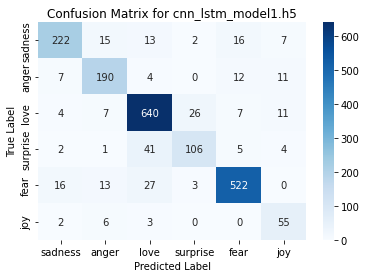

lstm_model1.h5 : Training loss: [0.007639320567250252, 0.9971093535423279], Validation loss: [0.6109978556632996, 0.879687488079071]
lstm_model1.h5 : Training accuracy: [0.007639320567250252, 0.9971093535423279], Validation accuracy: [0.6109978556632996, 0.879687488079071]
100/100 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

       anger       0.87      0.89      0.88       427
        fear       0.82      0.82      0.82       397
         joy       0.88      0.94      0.91      1021
        love       0.85      0.70      0.77       296
     sadness       0.93      0.92      0.93       946
    surprise       0.77      0.72      0.74       113

    accuracy                           0.88      3200
   macro avg       0.85      0.83      0.84      3200
weighted avg       0.88      0.88      0.88      3200



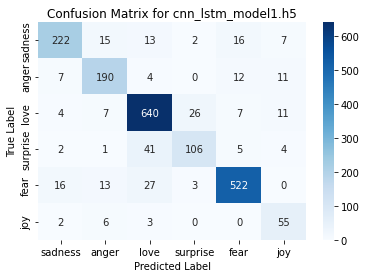

cnn_lstm_model1.h5 : Training loss: [0.00592415314167738, 0.9973437786102295], Validation loss: [0.7244653105735779, 0.8556249737739563]
cnn_lstm_model1.h5 : Training accuracy: [0.00592415314167738, 0.9973437786102295], Validation accuracy: [0.7244653105735779, 0.8556249737739563]
100/100 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

       anger       0.86      0.83      0.85       427
        fear       0.79      0.81      0.80       397
         joy       0.85      0.92      0.88      1021
        love       0.81      0.68      0.74       296
     sadness       0.93      0.89      0.91       946
    surprise       0.66      0.73      0.70       113

    accuracy                           0.86      3200
   macro avg       0.82      0.81      0.81      3200
weighted avg       0.86      0.86      0.86      3200



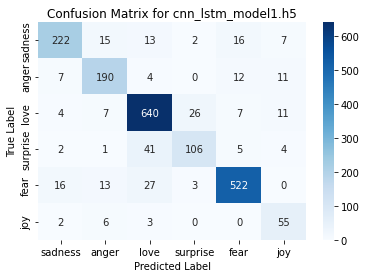

In [ ]:
models = ['cnn_model.h5', 'lstm_model.h5', 'cnn_lstm_model.h5','cnn_model1.h5', 'lstm_model1.h5', 'cnn_lstm_model1.h5']
import keras

for model_file in models:
    # Load the model
    loaded_model = keras.models.load_model(model_file)

    # Compute the training and validation loss
    loss = loaded_model.evaluate(X_train, y_train, verbose=0)
    val_loss = loaded_model.evaluate(X_val, y_val, verbose=0)

    print(f'{model_file} : Training loss: {loss}, Validation loss: {val_loss}')

    # Compute the training and validation accuracy
    accuracy = loaded_model.evaluate(X_train, y_train, verbose=0)
    val_accuracy = loaded_model.evaluate(X_val, y_val, verbose=0)

    print(f'{model_file} : Training accuracy: {accuracy}, Validation accuracy: {val_accuracy}')

    # Compute the classification report
    y_pred = loaded_model.predict(X_val)
    y_pred = np.argmax(y_pred, axis=1)
    # Get the predicted emotion label
    y_pred_label = encoder.inverse_transform(y_pred)
    y_val_class_label= encoder.inverse_transform(y_val_class)
    print(classification_report(y_val_class_label, y_pred_label))

  # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_class)

    # Create a dataframe from the confusion matrix
    df_cm = pd.DataFrame(cm, index=emotions, columns=emotions)

    # Plot the confusion matrix
    sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')
    plt.title("Confusion Matrix for "+model_name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


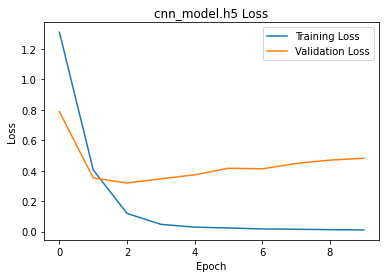

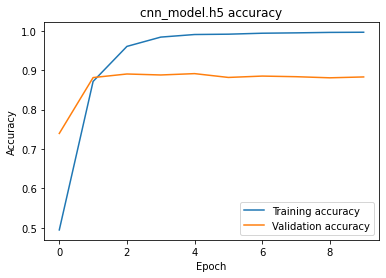

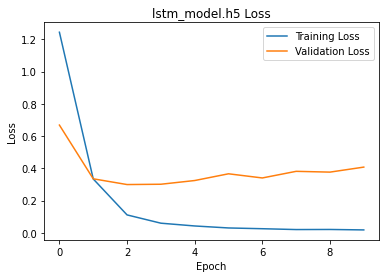

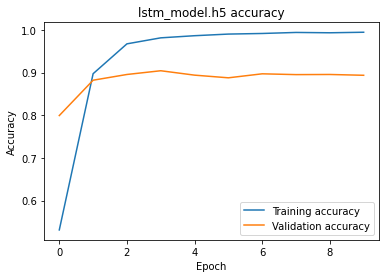

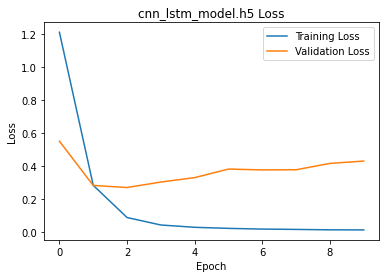

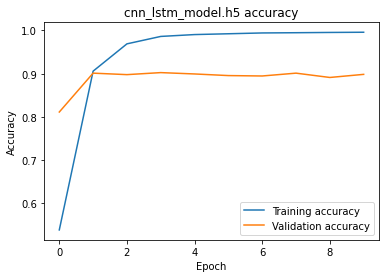

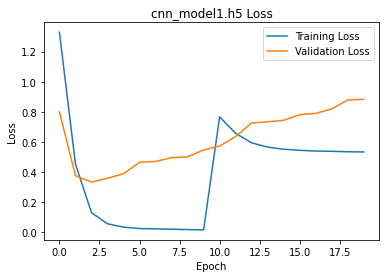

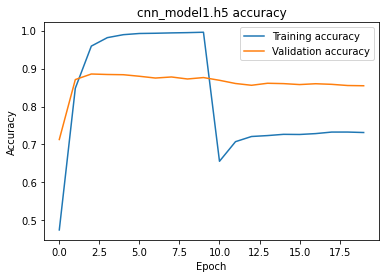

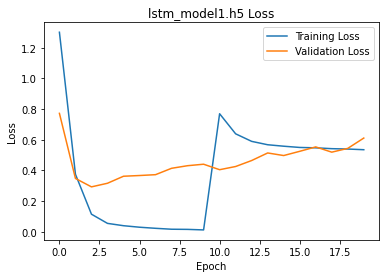

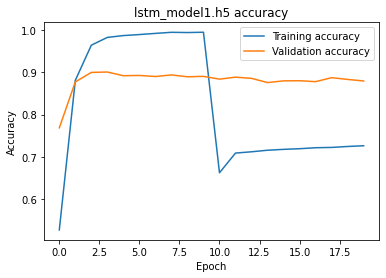

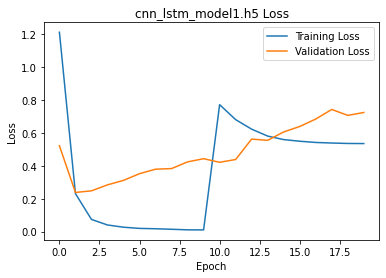

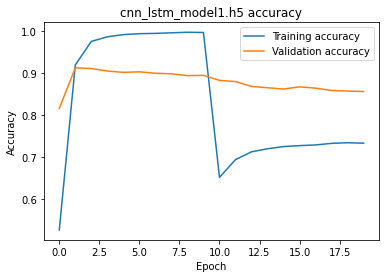

In [ ]:
models = ['cnn_model.h5', 'lstm_model.h5', 'cnn_lstm_model.h5','cnn_model1.h5', 'lstm_model1.h5', 'cnn_lstm_model1.h5']
history = ['cnn_history.json', 'lstm_history.json', 'cnn_lstm_history.json','cnn1_history.json', 'lstm1_history.json', 'cnn_lstm1_history.json']
for model_file, hist_file in zip(models, history):
    # Load the saved history
    with open(hist_file, 'r') as f:
        hist = json.load(f)
    # Plot the training and validation loss
    plt.plot(hist['loss'], label='Training Loss')
    plt.plot(hist['val_loss'], label='Validation Loss')
    plt.title(model_file + ' Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Plot the training and validation accuracy
    plt.plot(hist['accuracy'], label='Training accuracy')
    plt.plot(hist['val_accuracy'], label='Validation accuracy')
    plt.title(model_file + ' accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
from typing import List, Dict

models = ['cnn_model.h5', 'lstm_model.h5', 'cnn_lstm_model.h5','cnn_model1.h5', 'lstm_model1.h5', 'cnn_lstm_model1.h5']

def predict_emotion(text: str, models: List[str]) -> Dict[str,List[str]]:
    # Preprocess text
    text = preprocess_text(text)
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=max_length)
    loaded_models = []
    predictions = {}
    for model_name in models:
        model = load_model(model_name)
        loaded_models.append(model)
        pred = np.argmax(model.predict(text))
        predictions[model_name] = emotions[pred]
    return predictions


In [ ]:
# Test the function
text = "I think I found the one"
predict_emotion(text,models)

1/1 [==============================] - 1s 517ms/step


{'cnn_model.h5': 'sadness',
 'lstm_model.h5': 'love',
 'cnn_lstm_model.h5': 'sadness',
 'cnn_model1.h5': 'love',
 'lstm_model1.h5': 'love',
 'cnn_lstm_model1.h5': 'love'}